In [29]:
%load_ext autoreload
%autoreload 2
import sys
import torch
import pickle
import pandas as pd
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
import matplotlib.pyplot as plt
from ml_utilities.torch_models.fc import FC
from erank.utils import load_model_from_idx, load_directions_matrix_from_task_sweep, load_multiple_dir_matrices_from_sweep
from erank.plot import plot_models_erank
from erank.analyses import create_model_erank_df
from erank.output_loader.job_output import SweepResult
from erank.output_loader.plot import plot_sweep_summary
gpu_id = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Erank plots

### Create model dict

In [30]:
sweep_dir = '/system/user/beck/pwbeck/projects/regularization/erank/outputs/mnist-11.7.0-lenet_rotatedtasks--221015_124528'
sweep_output_path = Path(sweep_dir) / 'outputs'
num_vectors = -1

In [31]:
# check for missing best_epoch_files
# sweep_output_path = sweep_conv4
for p in sweep_output_path.iterdir():
    bepf = p / 'best_step.txt'
    if not bepf.exists():
        print(str(p))

In [32]:
pretrain_variations = {
    'pretrain_steps_0': '*init_model_step-0-*',
    'pretrain_steps_5': '*init_model_step-5-*',
    'pretrain_steps_15': '*init_model_step-15-*',
    'pretrain_steps_50': '*init_model_step-50-*',
    'pretrain_steps_100': '*init_model_step-100-*',
}

In [33]:
# load a model
run = next(iter(sweep_output_path.iterdir()))
init_model = load_model_from_idx(run, idx=0, device='cpu')

In [34]:
# load model matrices
# model_dict = load_multiple_dir_matrices_from_sweep(path_to_runs=sweep_output_path,
#                                                    name_run_glob_pattern_dict=pretrain_variations,
#                                                    num_runs=num_vectors,
#                                                    device='cpu')
# with open(Path('./../tmp/erank_plots/') / f'model_dict_lenet_rotated_tasks_conv4_num_vecs{num_vectors}.p', 'wb') as savefile:
#     pickle.dump(model_dict, savefile, protocol=pickle.HIGHEST_PROTOCOL)

### Load model dict

In [35]:
model_dict_path = f'./../tmp/erank_plots/model_dict_mnist_rotated_tasks_lenet_num_vecs{num_vectors}.p'
model_dict_path = Path(model_dict_path)
# init_model_path = './../tmp/erank_plots/init_model.p'
# init_model_path = Path(init_model_path)

In [36]:
# load init model
# init_model = FC.load(init_model_path, device=gpu_id)
# init_model, init_model.device

In [37]:
# unpickle model dict
with open(model_dict_path, 'rb') as loadfile:
    model_dict = pickle.load(loadfile)

In [38]:
list(model_dict.keys()), type(model_dict)

(['pretrain_steps_0#*init_model_step-0-*',
  'pretrain_steps_5#*init_model_step-5-*',
  'pretrain_steps_15#*init_model_step-15-*',
  'pretrain_steps_50#*init_model_step-50-*',
  'pretrain_steps_100#*init_model_step-100-*'],
 dict)

### Generate erank plot

In [39]:
erank_df = create_model_erank_df(models=model_dict, random_init_model=init_model, device=gpu_id)

Calculate eranks: 100%|██████████| 37/37 [00:15<00:00,  2.32it/s]


In [40]:
# erank_df.to_pickle('./erank_df.p')

In [41]:
# erank_df = pd.read_pickle('./../tmp/erank_plots/erank_df.p')

In [42]:
# column_name_to_plot_kwargs = {'almost_point#*ampl-1.0_1.1-ph-0_0.1*': {'label': 'Very narrow', 'color':'#ffa600'},
#                               'narrow#*ampl-0.1_2.5-ph-0_1.5*': {'label': 'Narrow', 'color':'#ff6e54'}, 
#                               'normal#*ampl-0.1_5.0-ph-0_3.141592654*': {'label': 'Regular', 'color':'#dd5182'}, 
#                               'wide#*ampl-0.1_10.0-ph-0_3.141592654*': {'label': 'Wide', 'color':'#955196'}, 
#                               'Random model initializations': {'label': 'Random model initializations', 'color':'#444e86'}, 
#                               'Gaussian random': {'label': 'Gaussian random vectors', 'color':'#003f5c'}, 
#                               }

In [43]:
column_name_to_plot_kwargs = {}

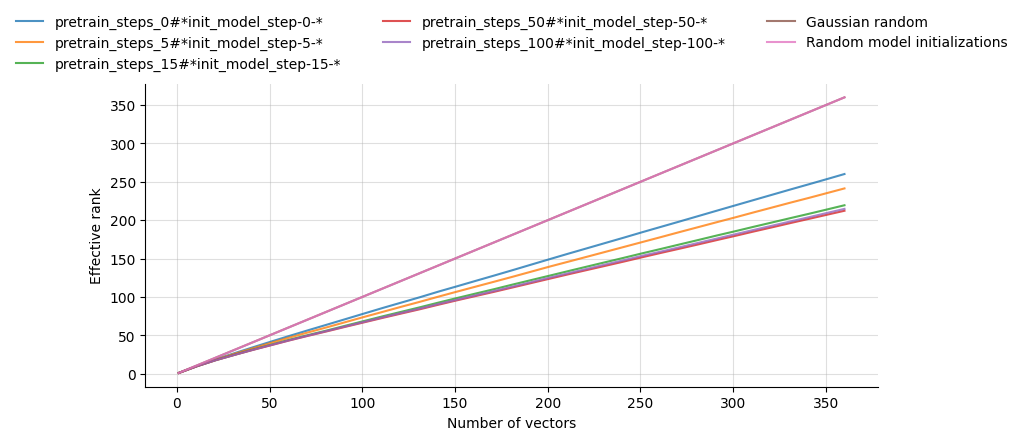

In [44]:
fig, ax = plot_models_erank(erank_df=erank_df, column_name_to_plot_kwargs=column_name_to_plot_kwargs, legend_columns=3, columnspacing=3.0)

In [45]:
# fig.savefig(f'11_6_mnist_lenet_rotatedtasks_erankplot.pdf', bbox_inches='tight')

In [46]:
# fig.savefig(f'11_6_mnist_conv4_rotatedtasks_erankplot.png', dpi=300, bbox_inches='tight')

## Details about runs

In [47]:
sweepr = SweepResult(sweep_dir)
sweepr.get_sweep_params()

['trainer.init_model_step', 'data.dataset_kwargs.rotation_angle']

In [48]:
sdf = sweepr.get_summary(log_source='val', row_sel=('train_step', 0), col_sel=['Accuracy'])
sdf

100%|██████████| 1800/1800 [01:03<00:00, 28.19it/s]


,best_step,best_val_score,Accuracy-train_step-0,trainer.init_model_step,data.dataset_kwargs.rotation_angle,seed
mnist-11.7.0-lenet_rotatedtasks--init_model_step-0-rotation_angle-0.0-seed-0--221015_195056,1550,0.976750,0.100833,0,0.000000,0
mnist-11.7.0-lenet_rotatedtasks--init_model_step-0-rotation_angle-0.5013927576601671-seed-0--221015_135150,1650,0.977750,0.101167,0,0.501393,0
mnist-11.7.0-lenet_rotatedtasks--init_model_step-0-rotation_angle-1.0027855153203342-seed-0--221015_184006,1550,0.977167,0.100417,0,1.002786,0
mnist-11.7.0-lenet_rotatedtasks--init_model_step-0-rotation_angle-1.5041782729805013-seed-0--221015_195009,1550,0.976917,0.100417,0,1.504178,0
mnist-11.7.0-lenet_rotatedtasks--init_model_step-0-rotation_angle-10.027855153203342-seed-0--221015_171532,1750,0.976750,0.099333,0,10.027855,0
...,...,...,...,...,...,...
mnist-11.7.0-lenet_rotatedtasks--init_model_step-50-rotation_angle-97.77158774373258-seed-0--221015_151920,1850,0.976250,0.131500,50,97.771588,0
mnist-11.7.0-lenet_rotatedtasks--init_model_step-50-rotation_angle-98.27298050139275-seed-0--221015_141644,1750,0.976167,0.131750,50,98.272981,0
mnist-11.7.0-lenet_rotatedtasks--init_model_step-50-rotation_angle-98.77437325905292-seed-0--221015_184903,1750,0.976417,0.131417,50,98.774373,0
mnist-11.7.0-lenet_rotatedtasks--init_model_step-50-rotation_angle-99.27576601671309-seed-0--221015_203949,1600,0.976417,0.131500,50,99.275766,0


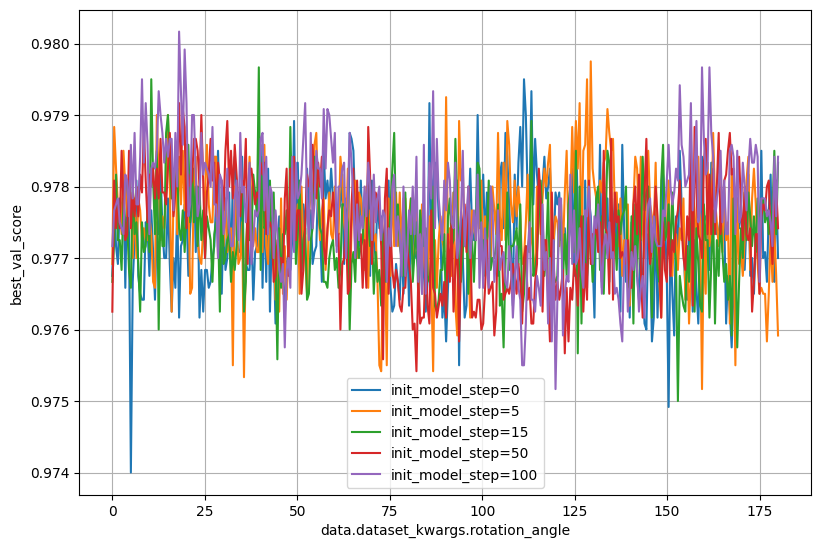

In [49]:
f = plot_sweep_summary(sdf, x_axis='data.dataset_kwargs.rotation_angle', y_axis='best_val_score', compare_parameter='trainer.init_model_step')

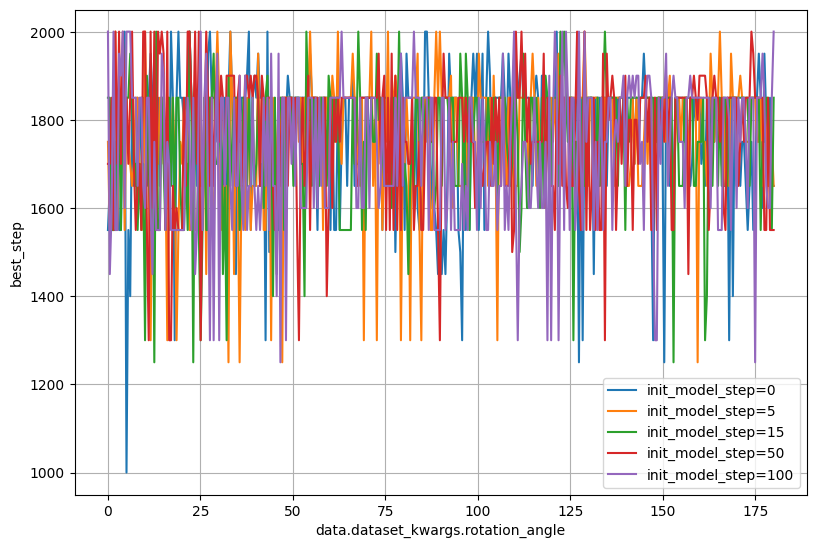

In [50]:
f = plot_sweep_summary(sdf, x_axis='data.dataset_kwargs.rotation_angle', y_axis='best_step', compare_parameter='trainer.init_model_step')

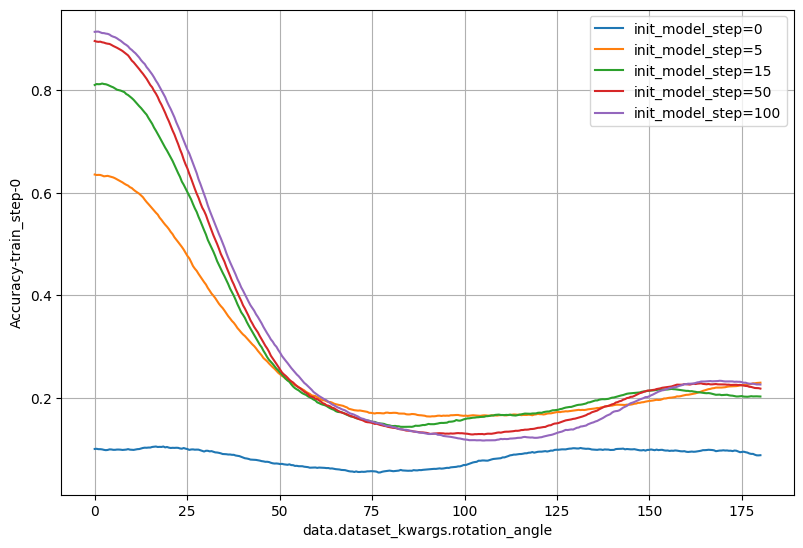

In [51]:
f = plot_sweep_summary(sdf, x_axis='data.dataset_kwargs.rotation_angle', y_axis='Accuracy-train_step-0', compare_parameter='trainer.init_model_step')

100%|██████████| 1800/1800 [01:04<00:00, 27.90it/s]


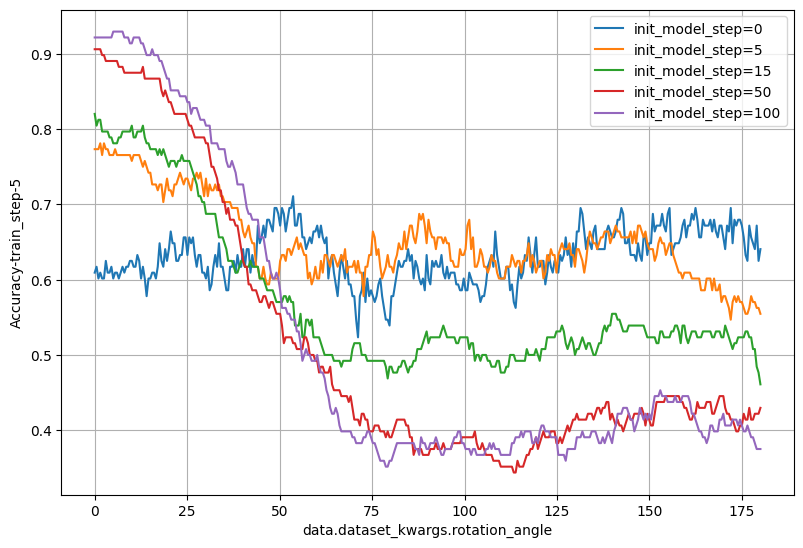

In [52]:
train_step = 5
sdf2 = sweepr.get_summary(log_source='train_step', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf2, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 1800/1800 [01:03<00:00, 28.18it/s]


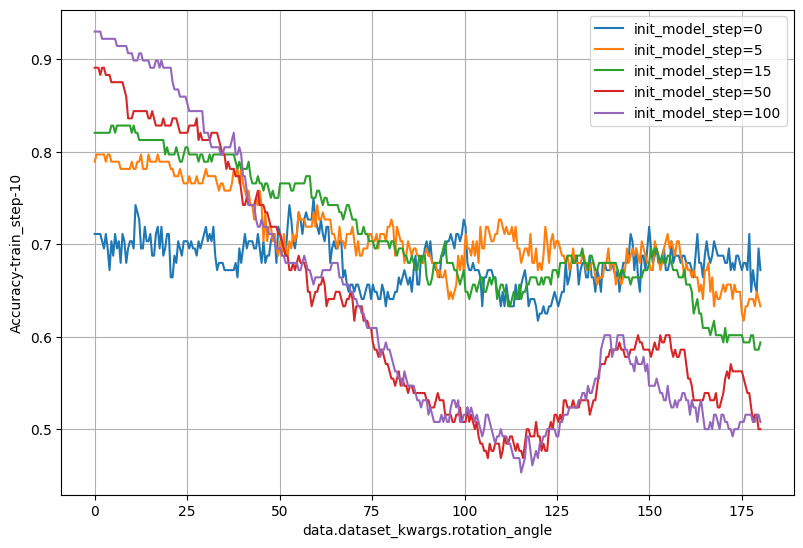

In [53]:
train_step = 10
sdf2 = sweepr.get_summary(log_source='train_step', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf2, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 1800/1800 [01:03<00:00, 28.14it/s]


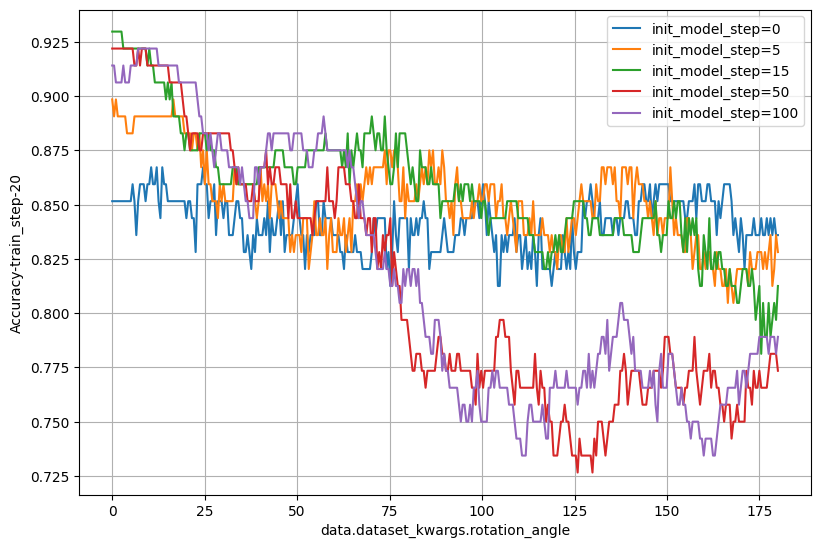

In [54]:
train_step = 20
sdf3 = sweepr.get_summary(log_source='train_step', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 1800/1800 [01:04<00:00, 28.06it/s]


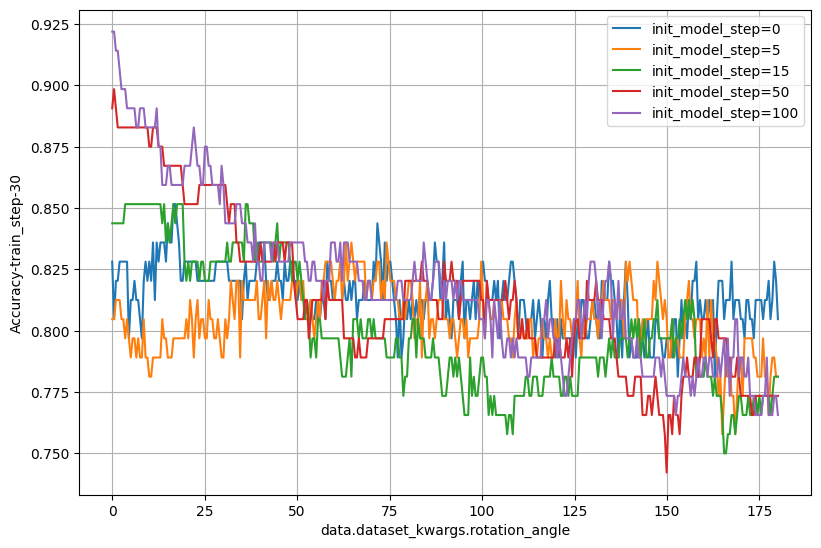

In [55]:
train_step = 30
sdf3 = sweepr.get_summary(log_source='train_step', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 1800/1800 [01:03<00:00, 28.13it/s]


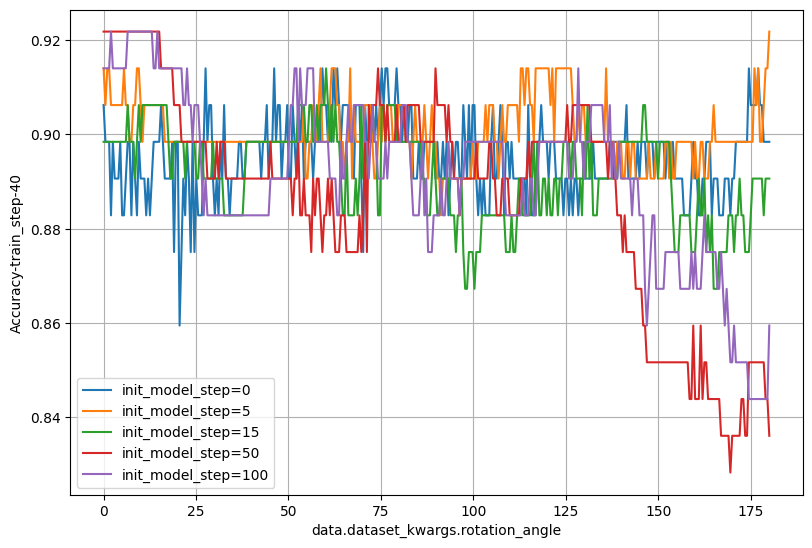

In [56]:
train_step = 40
sdf3 = sweepr.get_summary(log_source='train_step', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 1800/1800 [01:04<00:00, 28.01it/s]


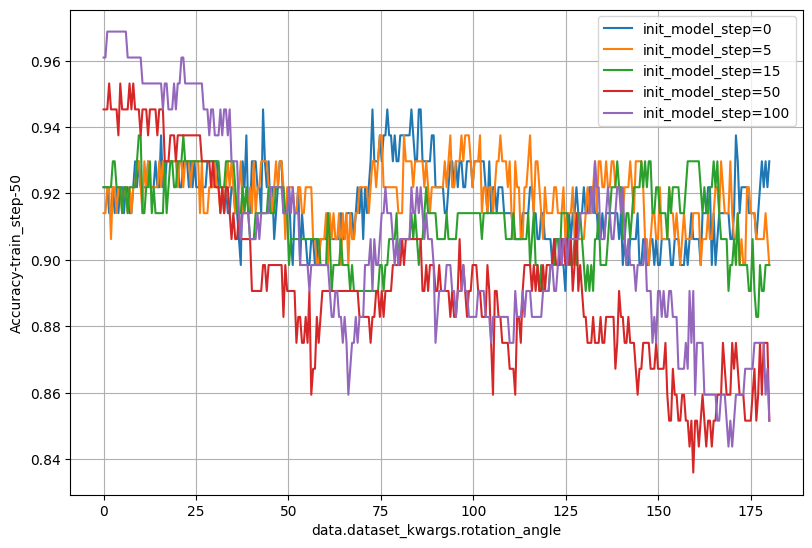

In [57]:
train_step = 50
sdf3 = sweepr.get_summary(log_source='train_step', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')

100%|██████████| 1800/1800 [01:04<00:00, 28.00it/s]


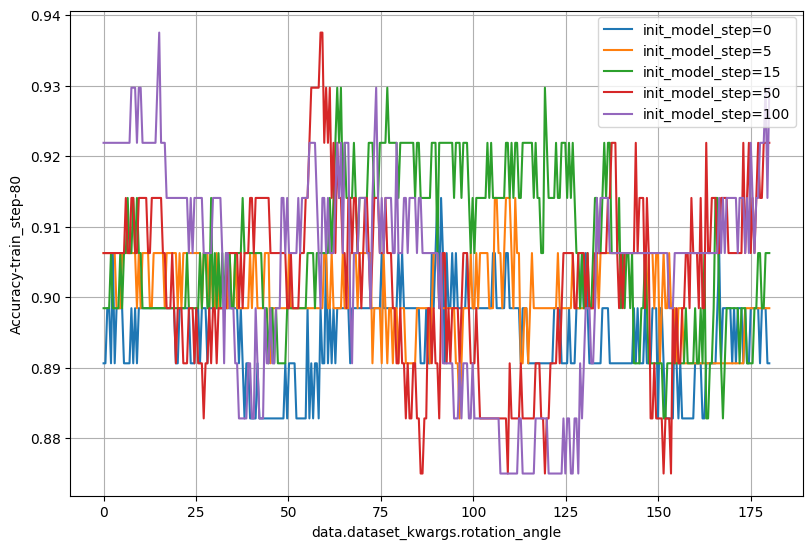

In [58]:
train_step = 80
sdf3 = sweepr.get_summary(log_source='train_step', row_sel=('train_step', train_step), col_sel=['Accuracy'])
f = plot_sweep_summary(sdf3, x_axis='data.dataset_kwargs.rotation_angle', y_axis=f'Accuracy-train_step-{train_step}', compare_parameter='trainer.init_model_step')